# Project Idea

For this project, a multiple linear regression model needs to be built to analyze a small business' historical marketing promotion data and estimate sales. Each row corresponds to an independent marketing promotion where their business uses TV, social media, radio, and influencer promotions to increase sales.

### Import packages

In [1]:
# Import libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Load dataset

In [5]:
# Load the dataset
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows.
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


## Step 2: Exploratory Data Analysis (EDA)

### Create a pairplot of the data
Create a pairplot to visualize the relationship between the continous variables in `data`

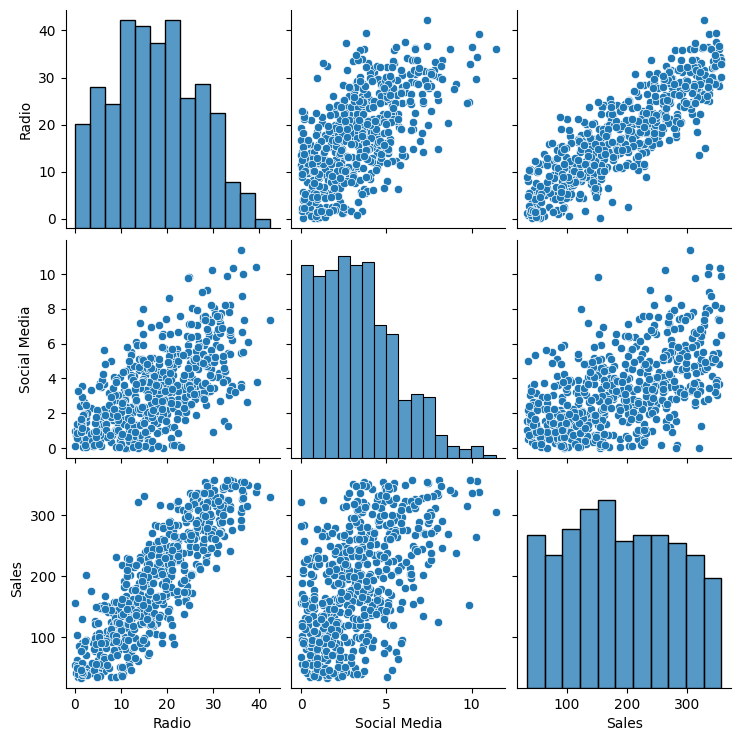

In [6]:
# Create a pairplot of the data.
sns.pairplot(data)

**Insight** 
`Radio` and `Social Media` both appear to have linear relationships with `Sales`

**Note** 
`TV` and `Influencer` are excluded from the pairplot because they are not numeric 

### Calculate the mean sales for each categorical variable
To characterize the relationship between the categorical variables and `Sales`, find the mean `Sales` for each category in `TV` and the mean `Sales` for each category in `Influencer`. 

In [7]:
# Calculate the mean sales for each TV category. 
print(data.groupby('TV')['Sales'].mean())

print('-----------------------')

# Calculate the mean sales for each Influencer category .
print(data.groupby('Influencer')['Sales'].mean())

TV
High      300.853195
Low        90.984101
Medium    195.358032
Name: Sales, dtype: float64
-----------------------
Influencer
Macro    181.670070
Mega     194.487941
Micro    188.321846
Nano     191.874432
Name: Sales, dtype: float64


**Insight**
- The average `Sales` for `High` `TV` promotions is considerably higher than for `Medium` and `Low` `TV` promotions. `TV` may be a strong predictor of `Sales`.
- The categories for `Influencer` have different average `Sales`, but the variation is not substantial. `Influencer` may be a weak predictor of `Sales`.

### Remove missing data

In [15]:
# Drop rows that contain missing data and update the DataFrame
data = data.dropna(axis=0)

### Clean column names

In [16]:
# Rename all columns in data that contain a space
data = data.rename(columns={'Social Media': 'Social_Media'})

## Step 3: Building Model

In [30]:
# Define the OLS formula
ols_formula = 'Sales ~ C(TV) + Radio'       # C refers to the Categorical feature

# Create an OLS model
OLS = ols(formula = ols_formula, data = data)

# Fit the model
model = OLS.fit()

# Save the results summary.
model_results = model.summary()

# Display the model results.
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Fri, 28 Jul 2023   Prob (F-statistic):          1.63e-288
Time:                        17:04:56   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Check model assumptions

### Model Assumption: Linearity
Create scatterplots comparing the continuous independent variable(s) were selected with `Sales` to check the linearity assumption.

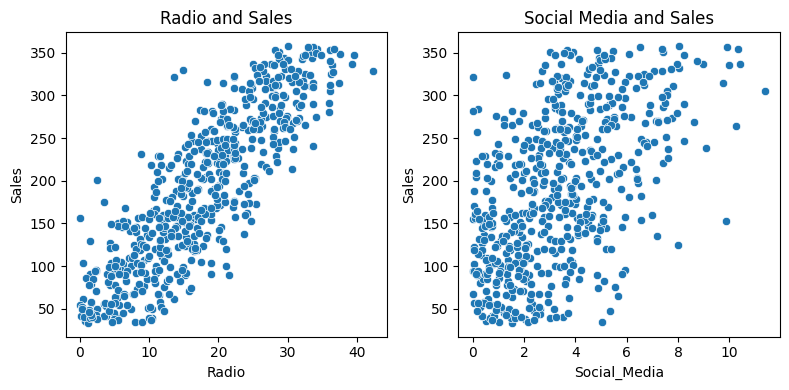

In [18]:
# Create a 1x2 plot figure
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a scatterplot between Radio and Sales
sns.scatterplot(x = data['Radio'], y = data['Sales'],ax=axes[0])

# Set the title of the first plot
axes[0].set_title("Radio and Sales")

# Create a scatterplot between Social Media and Sales
sns.scatterplot(x = data['Social_Media'], y = data['Sales'],ax=axes[1])

# Set the title of the second plot
axes[1].set_title("Social Media and Sales")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

**Insight**
The linearity assumption holds for `Radio`, as there is a clear linear relationship in the scatterplot between `Radio` and `Sales`. Also, the `Social_Media` does appear to have a linear relationship with `Sales`.

### Model Assumption: Normality
Create the histogram and Q-Q plots to check the normality of residuals.

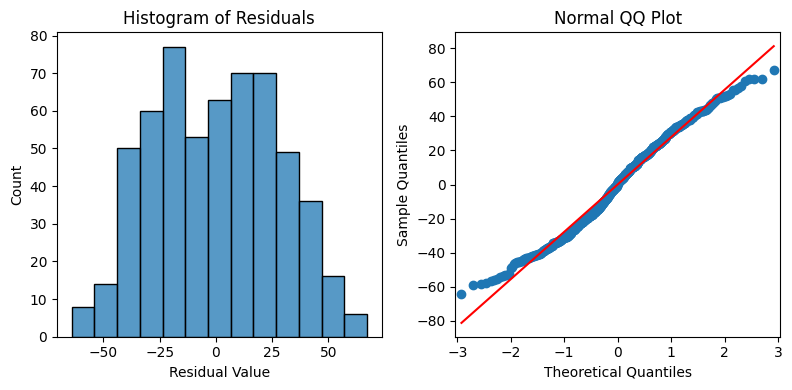

In [19]:
# Calculate the residuals
residuals = model.resid

# Create a 1x2 plot figure
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals 
sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.
sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the Q-Q plot.
axes[1].set_title("Normal QQ Plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()

**Insight** 
The histogram of the residuals are approximately normally distributed, which supports that the normality assumption is met for this model. 
The residuals in the Q-Q plot form a straight line, further supporting that this assumption is met.

### Model Assumption: Constant Variance
1. Create a scatterplot with the fitted values and residuals.
2. Then, add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$ and to check that the **constant variance assumption** is not violated.

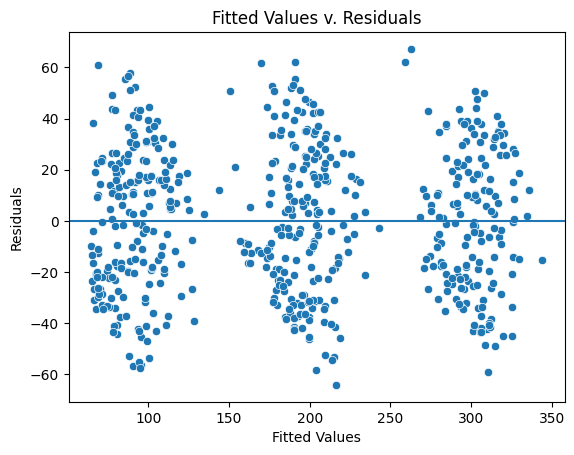

In [20]:
# Create a scatterplot with the fitted values from the model and the residuals.
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x axis label.
fig.set_xlabel("Fitted Values")

# Set the y axis label.
fig.set_ylabel("Residuals")

# Set the title.
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.
fig.axhline(0)

# Show the plot.
plt.show()

**Insight**
The fitted values are in three groups because the categorical variable is dominating in this model, meaning that TV is the biggest factor that decides the sales. However, the variance where there are fitted values is similarly distributed, validating that the assumption is met.

### Model Assumption: No Multicollinearity
1. **One Approach:** create scatterplots to show the relationship between pairs of independent variables. 
2. **Another Approach:** use the _Variance Inflation Factor_ (VIF)to detect multicollinearity

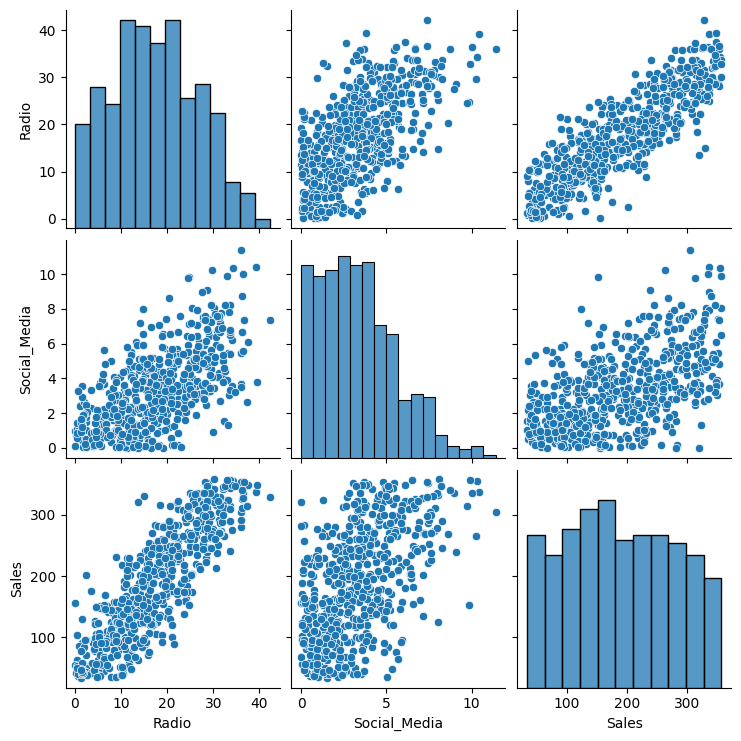

In [21]:
# One way: create a pairplot of the data.
sns.pairplot(data)

In [22]:
# Another way: calculate the Variance Inflation Factor (VIF)

# Import variance_inflation_factor from statsmodels.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a subset of the data with the continous independent variables 
X = data[['Radio','Social_Media']]

# Calculate the variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# Display the VIF results.
df_vif

,VIF
Radio,5.170922
Social_Media,5.170922


**Insight** 
- The model only has one continous independent variable, meaning there are no multicollinearity issues. 
- If the model used both `Radio` and `Social_Media` as predictors, there would be a moderate linear relationship between `Radio` and `Social_Media` that violates the multicollinearity assumption.
- Furthermore, the variance inflation factor when both `Radio` and `Social_Media` are included in the model is 5.17 for each variable, indicating high multicollinearity.

## Step 4: Results and Evaluation

In [23]:
# Display the model results summary.
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Fri, 28 Jul 2023   Prob (F-statistic):          1.63e-288
Time:                        16:52:38   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpret Model Coefficients** 
- Using `TV` and `Radio` as the independent variables results in a multiple linear regression model with $R^{2} = 0.904$. In other words, the model explains $90.4\%$ of the variation in `Sales`. This makes the model an excellent predictor of `Sales`. 

- The default `TV` category for the model is `High` since there are coefficients for the other two `TV` categories, `Medium` and `Low`. Because the coefficients for the `Medium` and `Low` `TV` categories are negative, that means the average of sales is lower for `Medium` or `Low` `TV` categories compared to the `High` `TV` category when `Radio` is at the same level. For example, the model predicts that a `Low` `TV` promotion is 154.2971 lower on average compared to a `high` `TV` promotion given the same `Radio` promotion.

- The coefficient for `Radio` is positive, confirming the positive linear relationship shown earlier during the exploratory data analysis.

- The p-value for all coefficients is $0.000$, meaning all coefficients are statistically significant at $p=0.05$. The 95% confidence intervals for each coefficient should be reported when presenting results to stakeholders. For example, there is a $95\%$ chance that the interval $[-163.979,-144.616]$ contains the true parameter of the slope of $\beta_{TVLow}$, which is the estimated difference in promotion sales when a `Low` `TV` promotion is chosen instead of a `High` `TV` promotion.

## Executive Summary

- High TV promotional budgets have a substantial positive influence on sales. The model estimates that switching from a high to medium TV promotional budget reduces sales by $\$75.3120$ million (95% CI $[-82.431,-68.193])$, and switching from a high to low TV promotional budget reduces sales by $\$154.297$ million (95% CI $[-163.979,-144.616])$. 

- The model also estimates that an increase of $\$1$ million in the radio promotional budget will yield a $\$2.9669$ million increase in sales (95% CI $[2.551,3.383]$). Thus, it is recommended that the business allot a high promotional budget to TV when possible and invest in radio promotions to increase sales. 